In [174]:
import graphlab as gl
import numpy as np
import graphlab.aggregate as agg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [175]:
path="Salaries.csv"
salariesDF=gl.SFrame.read_csv(path)

Finished parsing file /home/learn/learning/kaggle/SFO_Salaries/Salaries.csv

Parsing completed. Parsed 100 lines in 0.646242 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,float,float,float,str,float,float,int,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unable to parse line "148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0,0,2014,,San Francisco,"

Unable to parse line "148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0,0,2014,,San Francisco,"

Unable to parse line "148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0,0,2014,,San Francisco,"

Unable to parse line "148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0,0,2014,,San Francisco,"

4 lines failed to parse correctly

Finished parsing file /home/learn/learning/kaggle/SFO_Salaries/Salaries.csv

Parsing completed. Parsed 148650 lines in 0.649662 secs.

In [176]:
salariesDF.head(2)

Columns:
	Id	int
	EmployeeName	str
	JobTitle	str
	BasePay	float
	OvertimePay	float
	OtherPay	float
	Benefits	str
	TotalPay	float
	TotalPayBenefits	float
	Year	int
	Notes	str
	Agency	str
	Status	str

Rows: 2

Data:
+----+----------------+-------------------------------+-----------+-------------+
| Id |  EmployeeName  |            JobTitle           |  BasePay  | OvertimePay |
+----+----------------+-------------------------------+-----------+-------------+
| 1  | NATHANIEL FORD | GENERAL MANAGER-METROPOLIT... | 167411.18 |     0.0     |
| 2  |  GARY JIMENEZ  | CAPTAIN III (POLICE DEPART... | 155966.02 |  245131.88  |
+----+----------------+-------------------------------+-----------+-------------+
+-----------+----------+-----------+------------------+------+-------+
|  OtherPay | Benefits |  TotalPay | TotalPayBenefits | Year | Notes |
+-----------+----------+-----------+------------------+------+-------+
| 400184.25 |          | 567595.43 |    567595.43     | 2011 |       |
| 137811.38 |          | 538909.28 |    538909.28     | 2011 |       |
+-----------+----------+-----------+------------------+------+-------+
+---------------+--------+
|     Agency    | Status |
+---------------+--------+
| San Francisco |        |
| San Francisco |        |
+---------------+--------+
[2 rows x 13 columns]

In [177]:
jobTitles=salariesDF['JobTitle'].unique()
len(jobTitles)

2158

In [178]:
year=salariesDF['Year'].unique()
year

dtype: int
Rows: 4
[2011, 2014, 2012, 2013]

In [179]:
basePay_Year=salariesDF.groupby(key_columns='Year',
                                operations={
                                    'mean_BasePay': agg.MEAN('BasePay'),
                                    'std_BasePay': agg.STD('BasePay'),
                                    'Quantile_BasePay': agg.QUANTILE('BasePay',[.25,.75,.95])
                               })
basePay_Year

Year,mean_BasePay,Quantile_BasePay,std_BasePay
2011,63595.9565168,"[33443.3, 90643.35,130457.94] ...",40556.2141772
2014,66564.4219245,"[30229.37, 94730.0,137982.18] ...",44053.2061231
2012,65436.4068574,"[33801.8, 92459.86,135029.72] ...",41781.6415754
2013,69630.0302165,"[37137.98, 98258.38,143289.0] ...",44236.5154202


In [180]:
totalPay_Year=salariesDF.groupby(key_columns='Year',
                                operations={
                                    'mean_TotalPay': agg.MEAN('TotalPay'),
                                    'std_TotalPay': agg.STD('TotalPay'),
                                    'Quantile_TotalPay': agg.QUANTILE('TotalPay',[.25,.75,.95])
                               })
totalPay_Year

Year,std_TotalPay,mean_TotalPay,Quantile_TotalPay
2011,47498.0497859,71744.1038712,"[36679.59, 102527.0,156131.87] ..."
2014,51693.9670411,75471.8369123,"[33260.22, 107973.02,169364.46] ..."
2012,49523.230813,74113.2622651,"[37513.36, 104126.85,164144.91] ..."
2013,52854.0720344,77611.4431421,"[36718.74, 109634.05,174525.35] ..."


In [181]:
otherPay_Year=salariesDF.groupby(key_columns='Year',
                                operations={
                                    'mean_OtherPay': agg.MEAN('OtherPay'),
                                    'std_OtherPay': agg.STD('OtherPay'),
                                    'Quantile_OtherPay': agg.QUANTILE('OtherPay',[.25,.75,.95])
                               })
totalPay_Year

Year,std_TotalPay,mean_TotalPay,Quantile_TotalPay
2011,47498.0497859,71744.1038712,"[36679.59, 102527.0,156131.87] ..."
2014,51693.9670411,75471.8369123,"[33260.22, 107973.02,169364.46] ..."
2012,49523.230813,74113.2622651,"[37513.36, 104126.85,164144.91] ..."
2013,52854.0720344,77611.4431421,"[36718.74, 109634.05,174525.35] ..."


In [182]:
summary_salary=basePay_Year.join(totalPay_Year, on='Year', how='left').join(otherPay_Year,on='Year',how='left')
summary_salary=summary_salary.to_dataframe()
summary_salary.head(2)

,Year,mean_BasePay,Quantile_BasePay,std_BasePay,std_TotalPay,mean_TotalPay,Quantile_TotalPay,Quantile_OtherPay,std_OtherPay,mean_OtherPay
0,2011,63595.956517,"[33443.3, 90643.35, 130457.94]",40556.214177,47498.049786,71744.103871,"[36679.59, 102527.0, 156131.87]","[0.0, 4052.14, 16320.02]",7959.779088,3617.081926
1,2014,66564.421925,"[30229.37, 94730.0, 137982.18]",44053.206123,51693.967041,75471.836912,"[33260.22, 107973.02, 169364.46]","[0.0, 4100.27, 16215.74]",7767.012271,3505.421251


## How has mean total pay, base pay and other pay changed over years

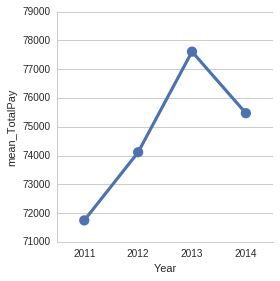

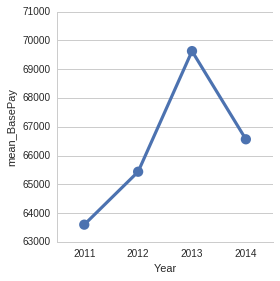

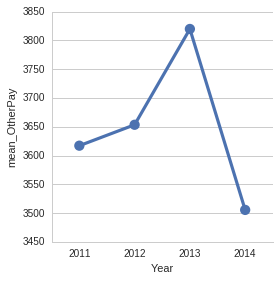

In [183]:
g_totalpay = sns.factorplot(x="Year", y="mean_TotalPay",data=summary_salary)
g_basepay = sns.factorplot(x="Year", y="mean_BasePay",data=summary_salary)
g_otherpay = sns.factorplot(x="Year", y="mean_OtherPay",data=summary_salary)

## Employee Job Title and Salary distribution

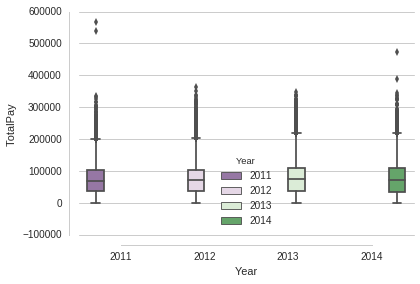

In [185]:
salariesDF_pd=salariesDF.to_dataframe()
sns.boxplot(x=salariesDF_pd['Year'], y=salariesDF_pd['TotalPay'], hue="Year", data=salariesDF_pd, palette="PRGn")
sns.despine(offset=10, trim=True)

## Total Pay Distribution across years

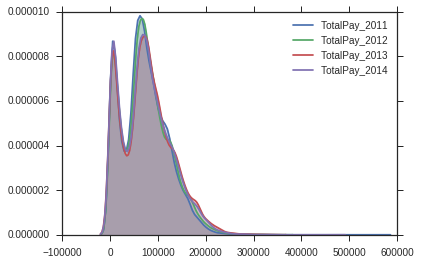

In [186]:
sns.set_style('ticks', {'axes.facecolor': 'none'})
d2011=salariesDF_pd[salariesDF_pd['Year']==2011]['TotalPay']
df_2011 = pd.DataFrame(d2011).reset_index()
df_2011.rename(columns={'TotalPay': 'TotalPay_2011'}, inplace=True)

d2012=salariesDF_pd[salariesDF_pd['Year']==2012]['TotalPay']
df_2012 = pd.DataFrame(d2012).reset_index()
df_2012.rename(columns={'TotalPay': 'TotalPay_2012'}, inplace=True)

d2013=salariesDF_pd[salariesDF_pd['Year']==2013]['TotalPay']
df_2013 = pd.DataFrame(d2013).reset_index()
df_2013.rename(columns={'TotalPay': 'TotalPay_2013'}, inplace=True)

d2014=salariesDF_pd[salariesDF_pd['Year']==2014]['TotalPay']
df_2014 = pd.DataFrame(d2014).reset_index()
df_2014.rename(columns={'TotalPay': 'TotalPay_2014'}, inplace=True)

#d2014.rename(columns={'TotalPay': 'TotalPay_2014'}, inplace=True)
sns.kdeplot(df_2011['TotalPay_2011'],shade=True)
sns.kdeplot(df_2012['TotalPay_2012'],shade=True)
sns.kdeplot(df_2013['TotalPay_2013'],shade=True)
sns.kdeplot(df_2014['TotalPay_2014'],shade=True)

## Base Pay distribution across years

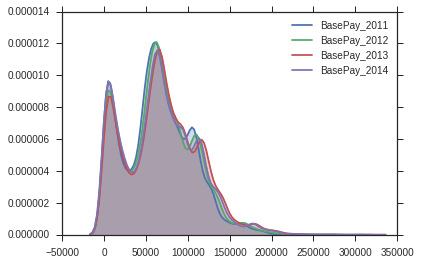

In [187]:
sns.set_style('ticks', {'axes.facecolor': 'none'})
d2011=salariesDF_pd[salariesDF_pd['Year']==2011]['BasePay']
df_2011 = pd.DataFrame(d2011).reset_index()
df_2011.rename(columns={'BasePay': 'BasePay_2011'}, inplace=True)

d2012=salariesDF_pd[salariesDF_pd['Year']==2012]['BasePay']
df_2012 = pd.DataFrame(d2012).reset_index()
df_2012.rename(columns={'BasePay': 'BasePay_2012'}, inplace=True)

d2013=salariesDF_pd[salariesDF_pd['Year']==2013]['BasePay']
df_2013 = pd.DataFrame(d2013).reset_index()
df_2013.rename(columns={'BasePay': 'BasePay_2013'}, inplace=True)

d2014=salariesDF_pd[salariesDF_pd['Year']==2014]['BasePay']
df_2014 = pd.DataFrame(d2014).reset_index()
df_2014.rename(columns={'BasePay': 'BasePay_2014'}, inplace=True)

#d2014.rename(columns={'TotalPay': 'TotalPay_2014'}, inplace=True)
sns.kdeplot(df_2011['BasePay_2011'],shade=True)
sns.kdeplot(df_2012['BasePay_2012'],shade=True)
sns.kdeplot(df_2013['BasePay_2013'],shade=True)
sns.kdeplot(df_2014['BasePay_2014'],shade=True)

In [188]:
jobTitleMaxPay=salariesDF.sort('TotalPay',ascending=False)['JobTitle','TotalPay','Year']
jobTitleMaxPay=jobTitleMaxPay.head(20)
jobTitleMaxPay=jobTitleMaxPay.to_dataframe()

## Job Titles with Max Salaries across years

In [189]:
jobTitleMaxPay

,JobTitle,TotalPay,Year
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43,2011
1,CAPTAIN III (POLICE DEPARTMENT),538909.28,2011
2,Deputy Chief 3,471952.64,2014
3,Asst Med Examiner,390111.98,2014
4,"Lieutenant, Fire Suppression",362844.66,2012
5,Captain 3,350403.41,2012
6,"Battalion Chief, Fire Suppress",347102.32,2013
7,Asst Med Examiner,344187.46,2014
8,Chief Investment Officer,339653.70,2014
9,Chief of Police,339282.07,2013


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

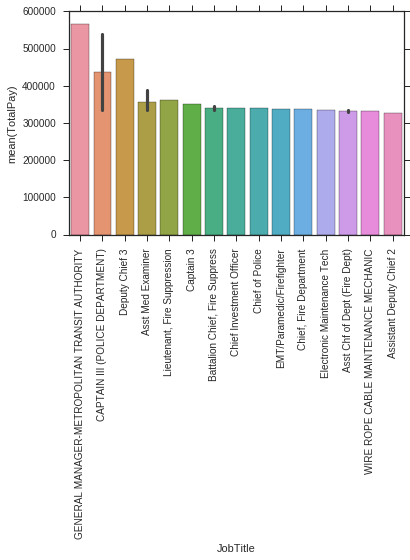

In [190]:
g=sns.barplot(x=jobTitleMaxPay['JobTitle'],y=jobTitleMaxPay['TotalPay'],data=jobTitleMaxPay)
plt.xticks(rotation=90)

## Job Title with Max Salary within a year

In [191]:
totalPay_Max_Year=salariesDF.groupby(key_columns='Year',
                                operations={
                                    'max_TotalPay': agg.ARGMAX('TotalPay','JobTitle')
                                            }
                                )
totalPay_Max_Year
# g = sns.factorplot(x=jobTitleMaxPay['JobTitle'],y=jobTitleMaxPay['TotalPay'],data=jobTitleMaxPay,hue=jobTitleMaxPay['Year'],kind="bar",col=jobTitleMaxPay['Year'])
# plt.xticks(rotation=90)

Year,max_TotalPay
2011,GENERAL MANAGER-METROPOLITAN TRANSIT ...
2014,Deputy Chief 3
2012,"Lieutenant, FireSuppression ..."
2013,"Battalion Chief, FireSuppress ..."


In [192]:
salariesDF_pd=salariesDF.to_dataframe()
salariesDF_TotalPaypd=salariesDF_pd.sort(['TotalPay'],ascending=False).groupby('Year')['TotalPay','JobTitle','Year']
salariesDF_TotalPaypd=salariesDF_TotalPaypd.head(5)
salariesDF_TotalPaypd

/home/learn/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,TotalPay,JobTitle,Year
0,567595.43,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,2011
1,538909.28,CAPTAIN III (POLICE DEPARTMENT),2011
110531,471952.64,Deputy Chief 3,2014
110532,390111.98,Asst Med Examiner,2014
36159,362844.66,"Lieutenant, Fire Suppression",2012
36167,350403.41,Captain 3,2012
72927,347102.32,"Battalion Chief, Fire Suppress",2013
110536,344187.46,Asst Med Examiner,2014
110533,339653.70,Chief Investment Officer,2014
72925,339282.07,Chief of Police,2013


## Max Salaries across Job Title group by year

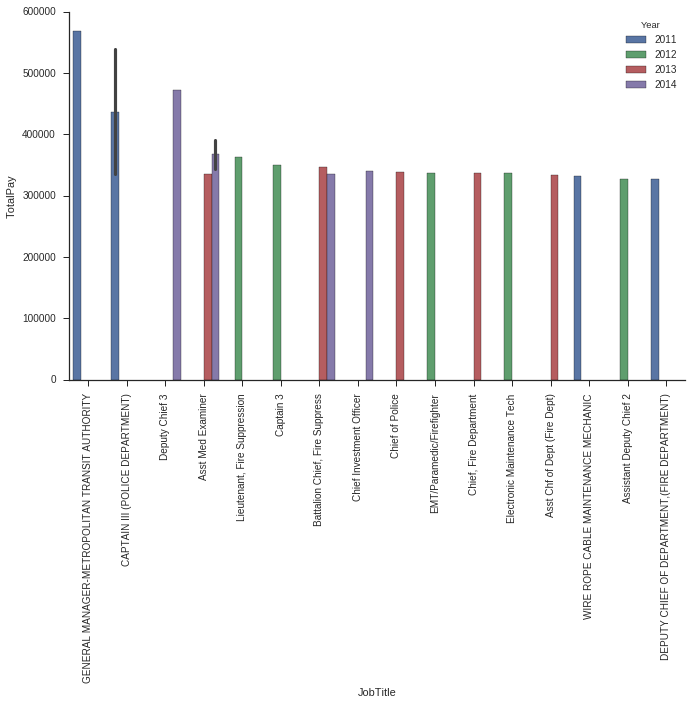

In [193]:
g=sns.factorplot(x='JobTitle',y='TotalPay',data=salariesDF_TotalPaypd,hue="Year",kind="bar",size=6,aspect=2,legend_out=False)
g.set_xticklabels(rotation=90)


In [194]:
salariesDFPos=salariesDF[salariesDF['TotalPay']>0]

## Job Titles with Min Salaries across years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

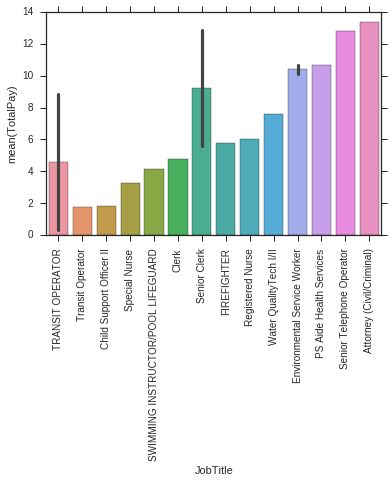

In [196]:
jobTitleMinPay=salariesDFPos.sort('TotalPay',ascending=True)['JobTitle','TotalPay']
jobTitleMinPay=jobTitleMinPay.head(20)
jobTitleMinPay=jobTitleMinPay.to_dataframe()
sns.barplot(x=jobTitleMinPay['JobTitle'],y=jobTitleMinPay['TotalPay'],data=jobTitleMinPay)
# g.set_xticklabels(rotation=90)
plt.xticks(rotation=90)

## Job Title with Min Salary within a year

In [197]:
totalPay_Min_Year=salariesDF.groupby(key_columns='Year',
                                operations={
                                    'min_TotalPay': agg.ARGMIN('TotalPay','JobTitle')
                                            }
                                )
totalPay_Min_Year
# g = sns.factorplot(x=jobTitleMaxPay['JobTitle'],y=jobTitleMaxPay['TotalPay'],data=jobTitleMaxPay,hue=jobTitleMaxPay['Year'],kind="bar",col=jobTitleMaxPay['Year'])
# plt.xticks(rotation=90)

Year,min_TotalPay
2011,"STATIONARY ENGINEER,WATER TREATMENT PLANT ..."
2014,"Counselor, Log CabinRanch ..."
2012,Deputy Court Clerk II
2013,Sewer Service Worker


In [198]:
salariesDF_pd=salariesDFPos.to_dataframe()
salariesDF_TotalPaypd=salariesDF_pd.sort(['TotalPay'],ascending=True).groupby('Year')['TotalPay','JobTitle','Year']
salariesDF_TotalPaypd=salariesDF_TotalPaypd.head(5)
salariesDF_TotalPaypd

/home/learn/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,TotalPay,JobTitle,Year
36155,0.30,TRANSIT OPERATOR,2011
72896,1.77,Transit Operator,2012
145612,1.83,Child Support Officer II,2014
72895,3.28,Special Nurse,2012
36154,4.17,SWIMMING INSTRUCTOR/POOL LIFEGUARD,2011
72894,4.75,Clerk,2012
110214,5.56,Senior Clerk,2013
36153,5.80,FIREFIGHTER,2011
148284,6.00,Registered Nurse,2014
106663,7.60,Water QualityTech I/II,2013


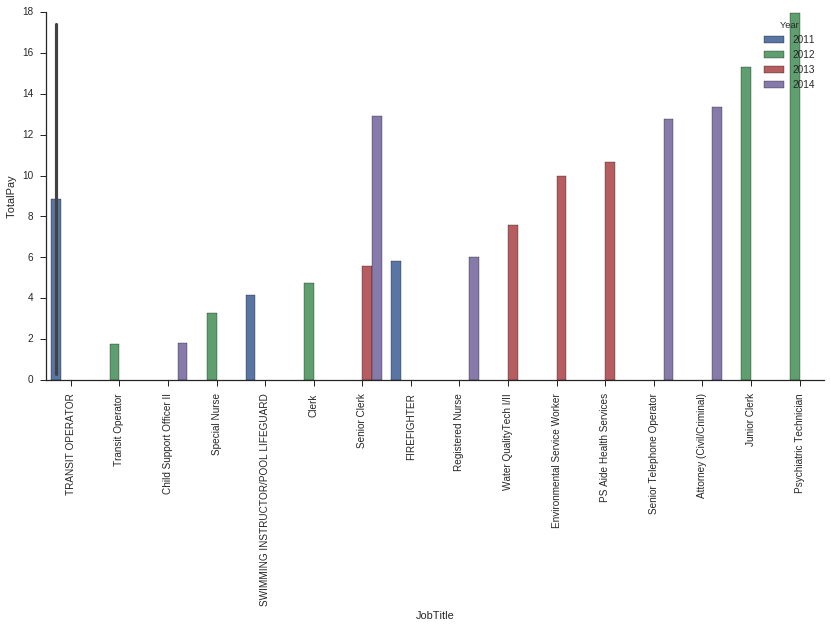

In [199]:
g=sns.factorplot(x='JobTitle',y='TotalPay',data=salariesDF_TotalPaypd,hue="Year",kind="bar",size=6,aspect=2,legend_out=False)
g.set_xticklabels(rotation=90)
